# The main task is answer a question which data (columns) have the most impact on decision if the client will subscribe a term deposit.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
traindata = pd.read_csv('bank-full.csv', index_col = False)
testdata = pd.read_csv('bank.csv', index_col = False)

In [77]:
traindata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [78]:
testdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Changing some columns name into more understanding expressions

In [79]:
new_columns_name = {"default": "default_credit",
                   "day": "contact-dayofmonth",
                   "month": "contact-month",
                   "duration": "contact-duration",
                   "pdays": "past_days_call",
                   "previous": "contacts_before_campaign",
                   "poutcome": "outcome_previous_campaign",
                   "y": "term_deposit"}

traindata = traindata.rename(columns = new_columns_name)
testdata = testdata.rename(columns = new_columns_name)

### Are there any inproper or missing data? (project description said that data is complete, but we check it)

In [80]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        45211 non-null  int64 
 1   job                        45211 non-null  object
 2   marital                    45211 non-null  object
 3   education                  45211 non-null  object
 4   default_credit             45211 non-null  object
 5   balance                    45211 non-null  int64 
 6   housing                    45211 non-null  object
 7   loan                       45211 non-null  object
 8   contact                    45211 non-null  object
 9   contact-dayofmonth         45211 non-null  int64 
 10  contact-month              45211 non-null  object
 11  contact-duration           45211 non-null  int64 
 12  campaign                   45211 non-null  int64 
 13  past_days_call             45211 non-null  int64 
 14  contac

In [81]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        4521 non-null   int64 
 1   job                        4521 non-null   object
 2   marital                    4521 non-null   object
 3   education                  4521 non-null   object
 4   default_credit             4521 non-null   object
 5   balance                    4521 non-null   int64 
 6   housing                    4521 non-null   object
 7   loan                       4521 non-null   object
 8   contact                    4521 non-null   object
 9   contact-dayofmonth         4521 non-null   int64 
 10  contact-month              4521 non-null   object
 11  contact-duration           4521 non-null   int64 
 12  campaign                   4521 non-null   int64 
 13  past_days_call             4521 non-null   int64 
 14  contacts

### There is no need to change a structure/values of the tables (columns have proper default data types and there are no missed data)

---

# **Statistic info**

## Compare basic stats in both datasets (training and testing).

In [82]:
traindata.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.9,10.6,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.3,3044.8,-8019.0,72.0,448.0,1428.0,102127.0
contact-dayofmonth,45211.0,15.8,8.3,1.0,8.0,16.0,21.0,31.0
contact-duration,45211.0,258.2,257.5,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.8,3.1,1.0,1.0,2.0,3.0,63.0
past_days_call,45211.0,40.2,100.1,-1.0,-1.0,-1.0,-1.0,871.0
contacts_before_campaign,45211.0,0.6,2.3,0.0,0.0,0.0,0.0,275.0


In [83]:
testdata.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.2,10.6,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.7,3009.6,-3313.0,69.0,444.0,1480.0,71188.0
contact-dayofmonth,4521.0,15.9,8.2,1.0,9.0,16.0,21.0,31.0
contact-duration,4521.0,264.0,259.9,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.8,3.1,1.0,1.0,2.0,3.0,50.0
past_days_call,4521.0,39.8,100.1,-1.0,-1.0,-1.0,-1.0,871.0
contacts_before_campaign,4521.0,0.5,1.7,0.0,0.0,0.0,0.0,25.0


### Very good representation training data by testing data (their most important statistics parameters: **mean**, **std**, **median** have similar values).

---

## Looking for ***Pearson*** and ***Spearman correlation***

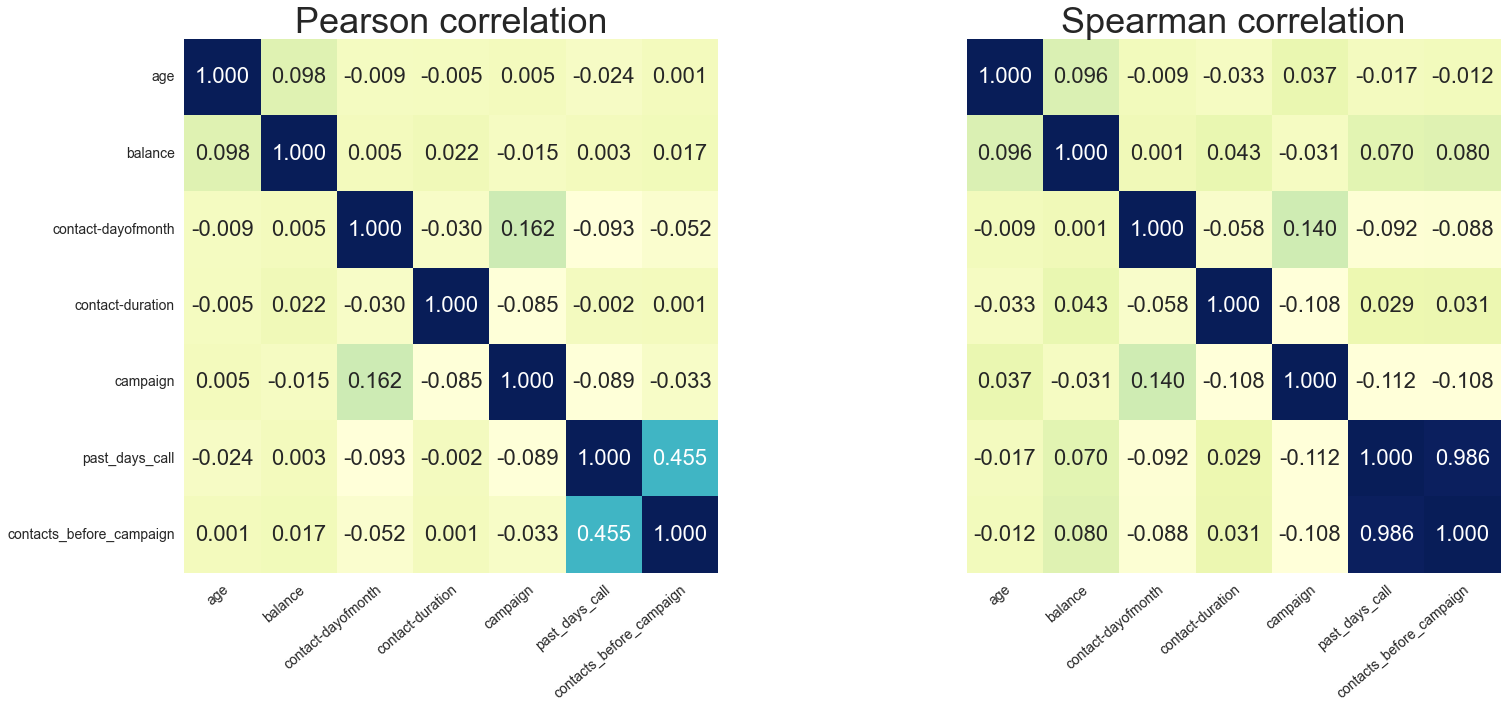

In [84]:
sns.set()

# Draw a heatmap with the numeric values in each cell
fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax_array = [ax1, ax2]
correlation_data = [traindata.corr(method='pearson'), traindata.corr(method='spearman')]
titles_array = ['Pearson correlation', 'Spearman correlation']

# We use axs parameter to tell seaborn which subplot to use for this plot
for axs, data, titles in zip(ax_array, correlation_data, titles_array):
    sns.heatmap(data = data, fmt = '.3f', square = True, cbar=False, cmap = "YlGnBu",
                annot = True, annot_kws = {"fontsize": 22}, ax = axs)
    axs.set_title(titles, fontsize = 36)
    tick_labels = ax1.get_xticklabels()
    axs.set_xticklabels(tick_labels, rotation = 40, ha = "right", rotation_mode = "anchor", fontsize = 14)
    axs.set_yticklabels(tick_labels, ha = "right", rotation_mode = "anchor", fontsize = 14)
    
# Y axis description on the left side only
ax2.set_yticklabels([])

plt.tight_layout()
plt.show()

### **Conclusion:**
High correlation between `contacts_before_campaign` and `past_days_call` is sensible (making the calls to the same person/client very often is depended on banking campaigns). This will be checking in plot - there is a chance to remove one of these features which will made future calculations much easier.

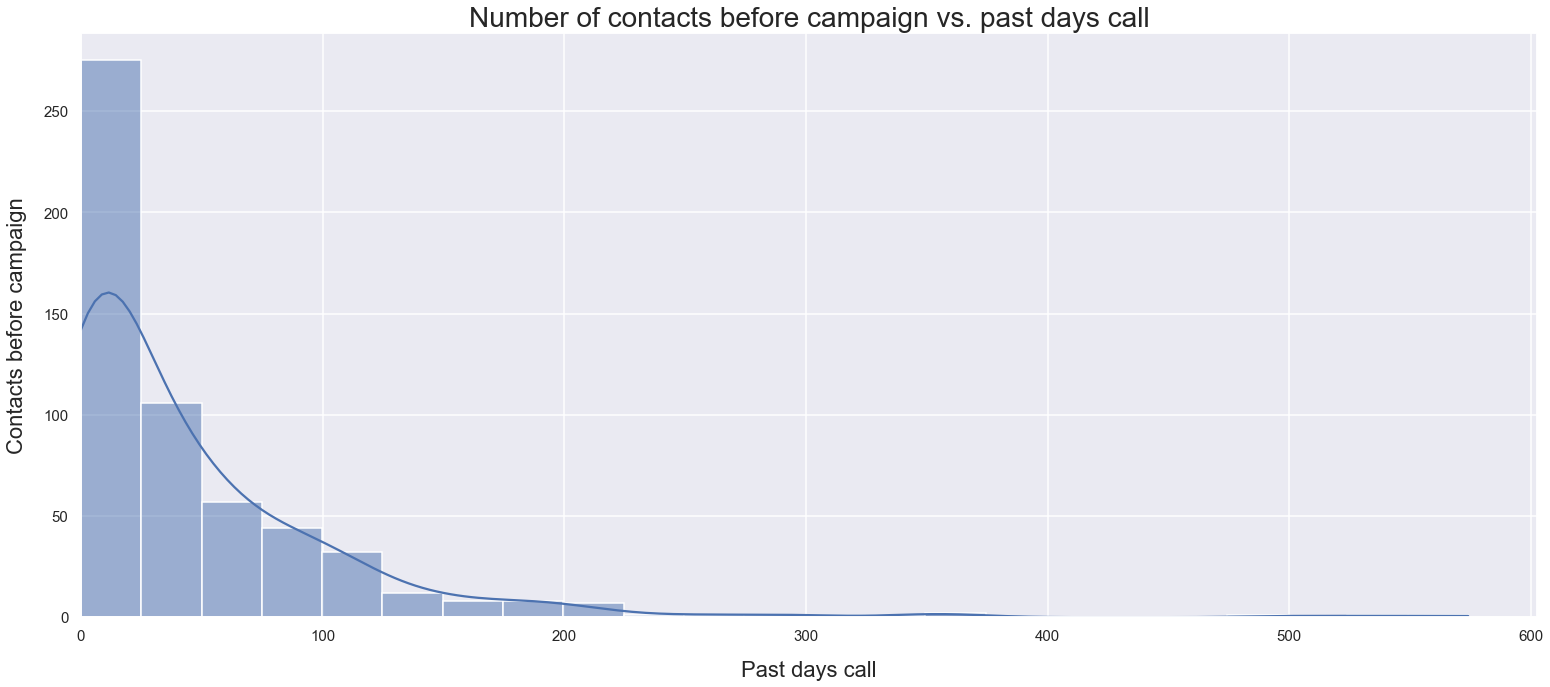

In [85]:
sum1 = traindata.groupby('past_days_call')['contacts_before_campaign'].sum()
past_days_call = traindata['past_days_call']
x_num = int(np.sqrt(len(sum1)))

sns.set_style("white")
sns.set_theme(context='talk', font_scale=1.2)
f, ax = plt.subplots(figsize = (22, 10))

# Plot a histogram with aproximate function
sns.histplot(data=sum1, kde=True, bins = x_num, palette="dark")
plt.xlim(left=0)
plt.xlabel('Past days call', labelpad = 16, fontsize = 22)
plt.ylabel('Contacts before campaign', labelpad = 16, fontsize = 22)
plt.title('Number of contacts before campaign vs. past days call', fontsize = 28)
ax.tick_params(labelsize = 15)

plt.tight_layout()

### Looking at the histogram shape we can agree that dependancy between these 2 variables is very high. One of these columns is useless, but there is no clear way to find out which of them should be deleted from the dataset.

### I decide to remove `'past_days_call'` from the both tables.

In [86]:
traindata = traindata.drop('past_days_call', axis=1)
testdata = testdata.drop('past_days_call', axis=1)

***

## Visual representation of dependancies between numerical data columns and target class (`'term_deposit'`)

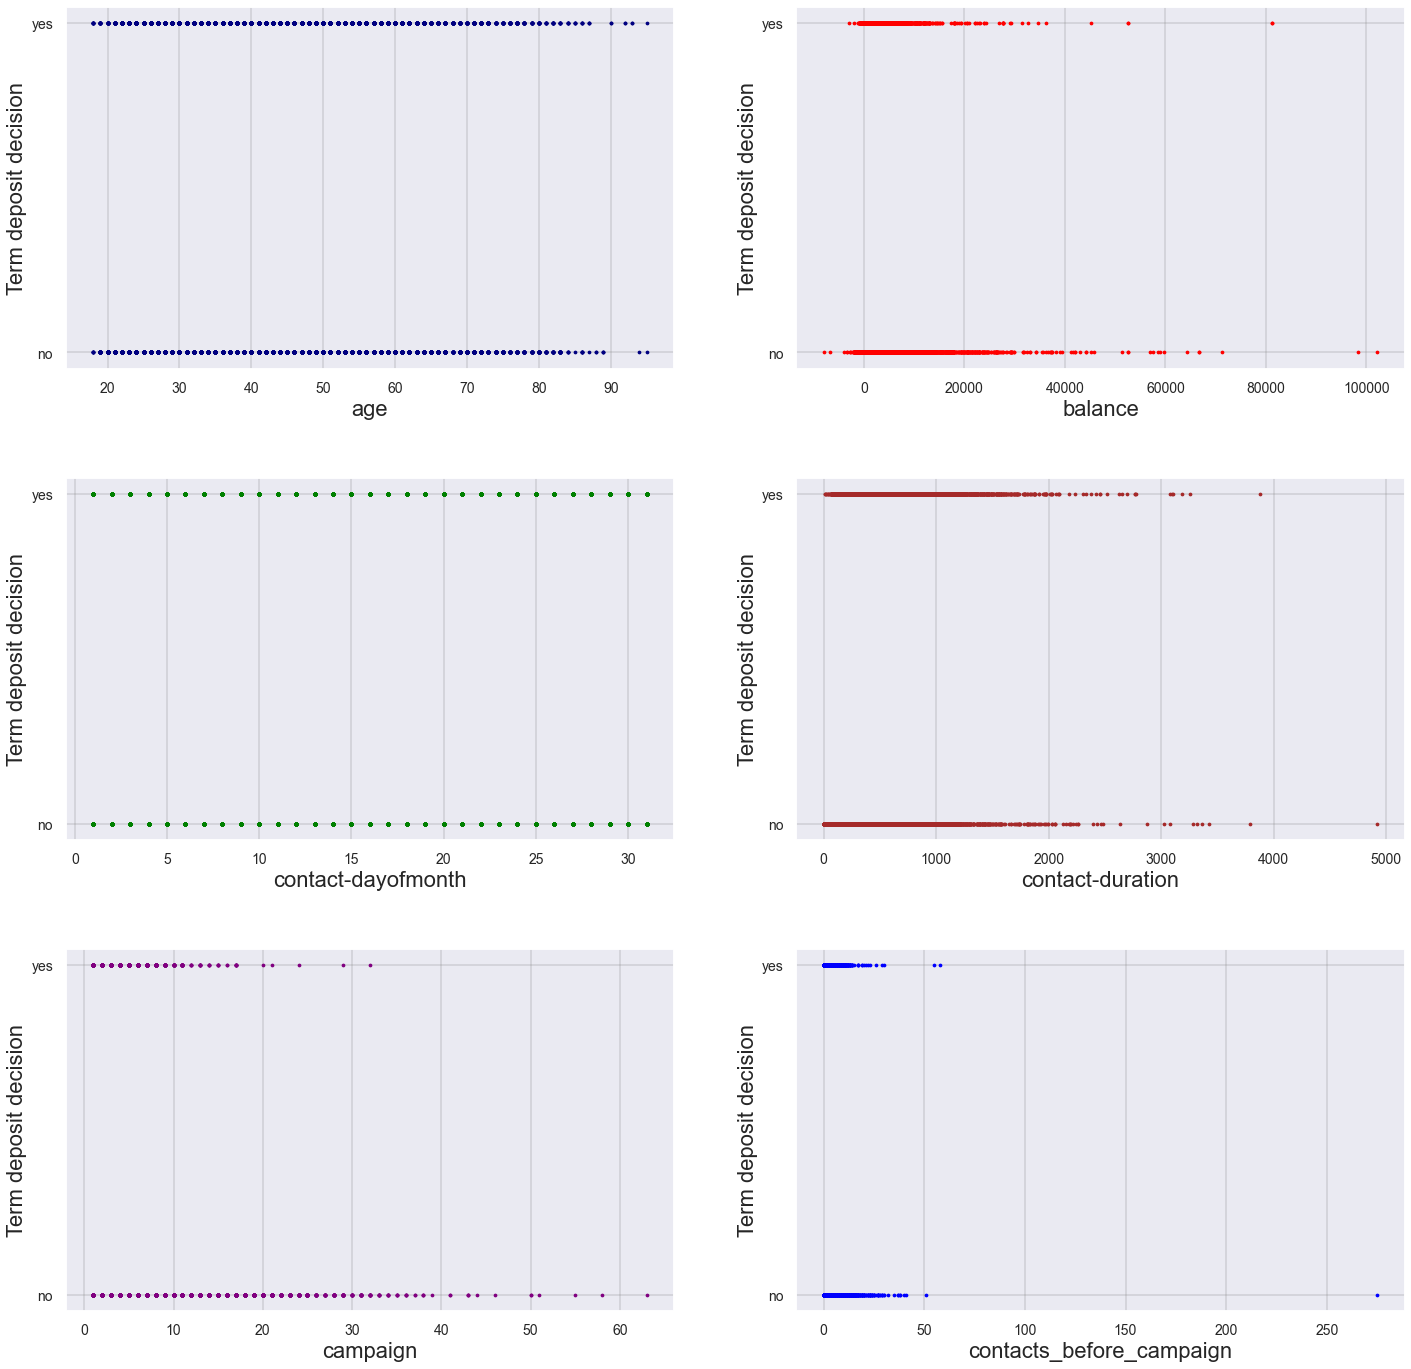

In [87]:
column_names = traindata.select_dtypes(include = 'number').columns
colors = ['navy', 'red', 'green', 'brown', 'purple', 'blue']

fig, ax = plt.subplots(3, 2, figsize=(24, 24))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plots = [ax[i, j] for i in range(0, 3) for j in range(0, 2)]

for column, colors, axs in zip(column_names, colors, plots):
    ## 2-D plots array
    axs.scatter(traindata[column], traindata['term_deposit'], c=colors, s=5)
    axs.set_xlabel(column, fontsize=22)
    axs.set_ylabel('Term deposit decision', fontsize=22)
    axs.tick_params(labelsize=14)
    axs.grid(color='grey', linestyle='-', linewidth=0.4)
    
plt.show()

### There are no clear dependancy between ***any x-axis data*** and `'term-deposit'` values (`'yes'`/`'no'` decision). The `'balance'` and `'age'` columns will be checking more closely, because results from these plots are... suspected. 
### Let's dive in:

In [88]:
traindata.groupby('term_deposit')['balance'].count()

term_deposit
no     39922
yes     5289
Name: balance, dtype: int64

In [89]:
traindata.groupby('term_deposit')['age'].count()

term_deposit
no     39922
yes     5289
Name: age, dtype: int64

### There are the same number of ***yes/no*** decisions for both columns.

### We take a look at the 2 extreme cases:
1) ***maximum balance when person did not get term deposit***,
2) ***minimum balance when person did get term deposit***.

In [90]:
## Option 1
opt1 = traindata.query("`term_deposit` == 'no'")['balance'].max()

## Option 2
opt2 = traindata.query("`term_deposit` == 'yes'")['balance'].min()

### Searching in the table **traindata** above 2 results

In [91]:
traindata[(traindata['balance']==opt1) | (traindata['balance']==opt2)]

,age,job,marital,education,default_credit,balance,housing,loan,contact,contact-dayofmonth,contact-month,contact-duration,campaign,contacts_before_campaign,outcome_previous_campaign,term_deposit
32713,39,self-employed,married,tertiary,no,-3058,yes,yes,cellular,17,apr,882,3,0,unknown,yes
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,0,unknown,no


### Which other things could be the reasons of making ***'yes'***/***'no'*** term deposit decisions by bank?

### From directly comparison 2 rows (indexes) we can get the most important differences that may affect on final decision. There are:
- 'job',
- 'marital',
- 'housing',
- 'loan',
- 'contact-duration',
- 'campaign'.

---

# **Classification methods**

## Using algorithms we will be looking for dependencies between data in column `'term_deposit'` and the rest of data in the table.

In [92]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

numeric_features1 = traindata.select_dtypes(include = 'number').columns
numeric_features2 = testdata.select_dtypes(include = 'number').columns
numeric_transformer = Pipeline(steps = [('scaler', StandardScaler())])

categorical_features1 = traindata.select_dtypes(exclude = 'number').columns.drop('term_deposit')
categorical_features2 = testdata.select_dtypes(exclude = 'number').columns.drop('term_deposit')
categorical_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

preprocessor = ColumnTransformer(transformers = [('num1', numeric_transformer, numeric_features1),
                                                 ('num2', numeric_transformer, numeric_features2),
                                                 ('cat1', categorical_transformer, categorical_features1),
                                                 ('cat2', categorical_transformer, categorical_features2)])

In [93]:
# Train and test data are divided into X (dependancy part) and y ('term_deposit')
X_train, y_train = traindata.drop('term_deposit', axis = 1), traindata['term_deposit']
X_test, y_test = testdata.drop('term_deposit', axis = 1), testdata['term_deposit']

# Append classifier to preprocessing pipeline.

In [94]:
def Default_hyperparam_results(algorythm):
    clf = Pipeline(steps = [('preprocessor', preprocessor),
                            ('classifier', algorythm)])
    clf.fit(X_train, y_train)
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    ## Classifier name and accuracy score and to compare in Dataframe later
    return [algorythm.__class__.__name__, (100*(acc_score)).round(2)]

## **1. LogisticRegression**

### It is the simplest and quite effective algorythm - it will be used as a 'reference point' when I will be comparing it with another classifiers.

In [95]:
from sklearn.linear_model import LogisticRegression

LogisticRegr_results = Default_hyperparam_results(LogisticRegression(max_iter = 1000))

#### Very good result was achieved - only default values (*`max_iter` increased only because of program warnings*).

## **2. KNeighbors**

In [96]:
from sklearn.neighbors import KNeighborsClassifier

KNeighbors_results = Default_hyperparam_results(KNeighborsClassifier())

## **3. Ridge**

In [97]:
from sklearn.linear_model import RidgeClassifier

Ridge_results = Default_hyperparam_results(RidgeClassifier())

## **4. NearestCentroid**

In [98]:
from sklearn.neighbors import NearestCentroid

NearestCentroid_results = Default_hyperparam_results(NearestCentroid())

## **5. DecisionTree**

In [99]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree_results = Default_hyperparam_results(DecisionTreeClassifier())

## **6. SGD** (equivalent to a linear SVM)

In [100]:
from sklearn.linear_model import SGDClassifier

SGD_results = Default_hyperparam_results(SGDClassifier())

## **7. Support vector machine (SVM)**

In [101]:
from sklearn.svm import SVC

SVC_results = Default_hyperparam_results(SVC())

In [102]:
df_default_params_results = pd.DataFrame(data=[LogisticRegr_results, KNeighbors_results,
                                               Ridge_results, NearestCentroid_results, 
                                               DecisionTree_results, SVC_results],
                                        columns=['Classifier', 'Accuracy_score'])

In [106]:
df_default_params_results.sort_values(by='Accuracy_score', ascending=False, ignore_index=True)

,Classifier,Accuracy_score
0,DecisionTreeClassifier,100.00
1,KNeighborsClassifier,91.77
2,SVC,91.35
3,LogisticRegression,90.20
4,RidgeClassifier,89.71
5,NearestCentroid,83.63


### Is 'DecisionTreeClassifier' accuracy score = 100% is fake? There are 2 options:
- use different classification score metric,
- default hyperparameter *'max_depth'* is not specified, so tree is growing till every node is equal 1 and every single sample is calculating and comparing with its neighbours

In [107]:
tree_num = range(5, 55, 5)

def DecisionTree_hyperparam_results(tree_num):
    _ = []
    for n in tree_num:
        clf = Pipeline(steps = [('preprocessor', preprocessor),
                                ('classifier', DecisionTreeClassifier(max_depth=n))])
        clf.fit(X_train, y_train)
        y_pred = clf.fit(X_train, y_train).predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        print(f'Accuracy={100*(acc_score):.2f}% for max_depth={n}')

DecisionTree_hyperparam_results(tree_num)

Accuracy=90.33% for max_depth=5
Accuracy=92.35% for max_depth=10
Accuracy=95.58% for max_depth=15
Accuracy=98.30% for max_depth=20
Accuracy=99.60% for max_depth=25
Accuracy=99.91% for max_depth=30
Accuracy=100.00% for max_depth=35
Accuracy=100.00% for max_depth=40
Accuracy=100.00% for max_depth=45
Accuracy=100.00% for max_depth=50


### There are 2 things to notice:
- with only `max_depth`=10 value is higher than accuracy result for the "second of the best" (92.35% vs. 91.77%),
- accuracy score is equal 100% when depth of the algorythm tree is 35 - this means that value in all tree nodes=1.

In [116]:
clf = Pipeline(steps = [('preprocessor', preprocessor),
                        ('classifier', DecisionTreeClassifier(max_depth=35))])
clf.fit(X_train, y_train)
y_pred = clf.fit(X_train, y_train).predict(X_test)
acc_score = accuracy_score(y_test, y_pred)

### Data achieved with the best accuracy result will be saved as a pandas DataFrame and into the csv file.

In [126]:
final_pred_values = pd.DataFrame(data={'Y predicted': y_pred, 'Y real': y_test})
final_pred_values[['Accuracy score', 'max_depth']] = [100*(acc_score), 35]
final_pred_values

,Y predicted,Y real,Accuracy score,max_depth
0,no,no,100.0,35
1,no,no,100.0,35
2,no,no,100.0,35
3,no,no,100.0,35
4,no,no,100.0,35
...,...,...,...,...
4516,no,no,100.0,35
4517,no,no,100.0,35
4518,no,no,100.0,35
4519,no,no,100.0,35


In [127]:
final_pred_values.to_csv('predicted_values.csv', index = False)
final_pred_values = pd.read_csv('predicted_values.csv', index_col = False)

# 
final_pred_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Y predicted     4521 non-null   object 
 1   Y real          4521 non-null   object 
 2   Accuracy score  4521 non-null   float64
 3   max_depth       4521 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 141.4+ KB


### As an additional info ***classification report*** and ***confusion matrix*** for SVC (gamma = 1) are visible below

In [128]:
SVC_classif_report = classification_report(y_test, y_pred)
SVC_conf_matrix = confusion_matrix(y_test, y_pred)

print('Classification report: \n', SVC_classif_report, '\n\n')
print('Confusion matrix: \n', SVC_conf_matrix)

Classification report: 
               precision    recall  f1-score   support

          no       1.00      1.00      1.00      4000
         yes       1.00      1.00      1.00       521

    accuracy                           1.00      4521
   macro avg       1.00      1.00      1.00      4521
weighted avg       1.00      1.00      1.00      4521
 


Confusion matrix: 
 [[4000    0]
 [   0  521]]


## Final conclusion:
### All parameters from ***classification report*** are equal 100%; ***confusion matrix*** show that no observations from more than 4500 of total were wrong classificated.
### Model for prediction is completed.